In [209]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import random
from keras.models import load_model, Sequential, Model
from keras.layers import Cropping2D
import cv2


In [210]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224), name="1"))
    model.add(Convolution2D(64, 3, 3, activation='relu', name="2"))
    model.add(ZeroPadding2D((1,1), name="3"))
    model.add(Convolution2D(64, 3, 3, activation='relu', name="4"))
    model.add(MaxPooling2D((2,2), strides=(2,2), name="5"))

    model.add(ZeroPadding2D((1,1), name="6"))
    model.add(Convolution2D(128, 3, 3, activation='relu', name="7"))
    model.add(ZeroPadding2D((1,1), name="8"))
    model.add(Convolution2D(128, 3, 3, activation='relu', name="9"))
    model.add(MaxPooling2D((2,2), strides=(2,2), name="10"))

    model.add(ZeroPadding2D((1,1), name="11"))
    model.add(Convolution2D(256, 3, 3, activation='relu', name="12"))
    model.add(ZeroPadding2D((1,1), name="13"))
    model.add(Convolution2D(256, 3, 3, activation='relu', name="14"))
    model.add(ZeroPadding2D((1,1), name="15"))
    model.add(Convolution2D(256, 3, 3, activation='relu', name="16"))
    model.add(MaxPooling2D((2,2), strides=(2,2), name="17"))

    model.add(ZeroPadding2D((1,1), name="18"))
    model.add(Convolution2D(512, 3, 3, activation='relu', name="19"))
    model.add(ZeroPadding2D((1,1), name="20"))
    model.add(Convolution2D(512, 3, 3, activation='relu', name="21"))
    model.add(ZeroPadding2D((1,1), name="22"))
    model.add(Convolution2D(512, 3, 3, activation='relu', name="23"))
    model.add(MaxPooling2D((2,2), strides=(2,2), name="24"))

    model.add(ZeroPadding2D((1,1), name="25"))
    model.add(Convolution2D(512, 3, 3, activation='relu', name="26"))
    model.add(ZeroPadding2D((1,1), name="27"))
    model.add(Convolution2D(512, 3, 3, activation='relu', name="28"))
    model.add(ZeroPadding2D((1,1), name="29"))
    model.add(Convolution2D(512, 3, 3, activation='relu', name="30"))
    model.add(MaxPooling2D((2,2), strides=(2,2), name="31"))

    model.add(Flatten(name="32"))
    model.add(Dense(4096, activation='relu', name="33"))
    model.add(Dropout(0.5, name="34"))
    model.add(Dense(4096, activation='relu', name="35"))
    model.add(Dropout(0.5, name="36"))
    #model.add(Dense(1000, activation='softmax', name="37"))

    if weights_path:
        model.load_weights(weights_path, by_name=True)

    return model

In [211]:
data_dir = "data_download"

driving_log_df = pd.read_csv(data_dir + "/driving_log.csv")
driving_log_df[['center', 'left', 'right']] = data_dir + "/" + driving_log_df[['center', 'left', 'right']]

# shuffle
np.random.seed(42)
driving_log_df = driving_log_df.reindex(np.random.permutation(driving_log_df.index), copy=False)

driving_log_df.head()

,center,left,right,steering,throttle,brake,speed
6637,data_download/IMG/center_2016_12_01_13_44_19_9...,data_download/ IMG/left_2016_12_01_13_44_19_95...,data_download/ IMG/right_2016_12_01_13_44_19_9...,-0.097735,0.985533,0.0,30.18678
6632,data_download/IMG/center_2016_12_01_13_44_19_4...,data_download/ IMG/left_2016_12_01_13_44_19_44...,data_download/ IMG/right_2016_12_01_13_44_19_4...,-0.078746,0.985533,0.0,30.18562
7327,data_download/IMG/center_2016_12_01_13_45_29_9...,data_download/ IMG/left_2016_12_01_13_45_29_92...,data_download/ IMG/right_2016_12_01_13_45_29_9...,-0.002791,0.985533,0.0,30.18650
730,data_download/IMG/center_2016_12_01_13_33_52_2...,data_download/ IMG/left_2016_12_01_13_33_52_24...,data_download/ IMG/right_2016_12_01_13_33_52_2...,0.000000,0.985533,0.0,30.18665
1515,data_download/IMG/center_2016_12_01_13_35_11_8...,data_download/ IMG/left_2016_12_01_13_35_11_81...,data_download/ IMG/right_2016_12_01_13_35_11_8...,0.000000,0.985533,0.0,30.18685


In [212]:
def get_next_image_generator(df, position = 'center'):
    for idx, image_path in enumerate(df[position]):
        img = cv2.imread(image_path)
#         steering = df['steering'].iloc[idx]
#         throttle = df['throttle'].iloc[idx]
#         brake = df['brake'].iloc[idx]
#         speed = df['speed'].iloc[idx]
        
        yield img
        #yield img, steering, throttle, brake, speed


In [213]:
tempgen = get_next_image_generator(driving_log_df)
sample = next(tempgen)
print("Dimension of image: H x W X D = ", sample.shape)
print("# of images: ", len(driving_log_df))

print("Steering range: Min=", np.min(driving_log_df['steering']), " , Max=", np.max(driving_log_df['steering']))
print("Throttle range: Min=", np.min(driving_log_df['throttle']), " , Max=", np.max(driving_log_df['throttle']))
print("Brake range: Min=", np.min(driving_log_df['brake']), " , Max=", np.max(driving_log_df['brake']))
print("Speed range: Min=", np.min(driving_log_df['speed']), " , Max=", np.max(driving_log_df['speed']))

print("image Min: ", np.min(sample))
print("image Max: ", np.max(sample))
sample

Dimension of image: H x W X D =  (160, 320, 3)
# of images:  8036
Steering range: Min= -0.9426954  , Max= 1.0
Throttle range: Min= 0.0  , Max= 0.9855326
Brake range: Min= 0.0  , Max= 1.0
Speed range: Min= 0.5024896  , Max= 30.70936
image Min:  0
image Max:  255


array([[[187, 143, 130],
        [185, 141, 128],
        [181, 137, 124],
        ..., 
        [ 14,  38,  30],
        [ 14,  35,  26],
        [  1,  20,  11]],

       [[162, 129, 114],
        [166, 133, 118],
        [171, 138, 123],
        ..., 
        [  0,  15,   6],
        [  0,   9,   1],
        [ 11,  34,  26]],

       [[115,  99,  83],
        [122, 106,  90],
        [134, 118, 102],
        ..., 
        [154, 184, 179],
        [  0,  11,   7],
        [  0,   6,   0]],

       ..., 
       [[ 91, 105, 104],
        [ 97, 111, 110],
        [101, 115, 114],
        ..., 
        [ 82,  96,  95],
        [ 75,  89,  88],
        [ 78,  92,  91]],

       [[110, 124, 123],
        [ 99, 113, 112],
        [ 87, 101, 100],
        ..., 
        [ 90, 104, 103],
        [ 85,  99,  98],
        [ 87, 101, 100]],

       [[ 88, 102, 101],
        [ 86, 100,  99],
        [ 89, 103, 102],
        ..., 
        [ 99, 113, 112],
        [101, 115, 114],
        [ 91, 105,

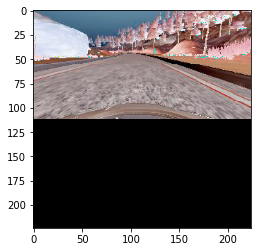

In [214]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#TODO: Make corners arithmetic generic
#(x,y), (x,y)

def crop_and_scale(sample):
    """
    Takes a landscape image and fits it into a 448x448 square (scaling as necessary)
    """
    new_image = np.zeros((448, 448, sample.shape[2]),dtype=np.float32)
    
    x = 0
    y = 0
    sample = cv2.resize(sample, (448, int(448/sample.shape[1]*sample.shape[0])))
    new_image[x:x+sample.shape[0], y:y+sample.shape[1], :] = sample

    
    # downsample
    new_image = new_image[::2, ::2, :]
    
    #     corners = (80, 0), (240, 160)
    #     cropped_sample = sample[corners[0][1]:corners[1][1], corners[0][0]:corners[1][0], :]
    #     cropped_and_upscaled = cv2.resize(cropped_sample, (224, 224))
    # return cropped_and_upscaled
    
    return new_image

cropped_and_upscaled = crop_and_scale(sample)
#print("Cropped and upscaled image shape: ", cropped_and_upscaled.shape)
plt.imshow(cropped_and_upscaled)

# resize


In [215]:
steering, throttle, brake, speed = driving_log_df['steering'], \
                                    driving_log_df['throttle'], \
                                    driving_log_df['brake'], \
                                    driving_log_df['speed']
            
# Need to output steering angle



In [286]:
# Raw data input: (8036, 160, 320, 3)
position = 'center'
val_portion = 0.2
total_len = len(driving_log_df)
val_len = int(val_portion * total_len)
train_len = total_len - val_len

# Process the data with cropping and scaling ()

def get_next_bottleneck_feature(df, batch_size = 32, mode = 'train', position = 'center', val_portion = 0.2):
    """
    Assumes df is already shuffled
    """
    total_len = len(df)
    val_len = int(val_portion * total_len)
    train_len = total_len - val_len
    if mode == "train":
        df = df[:train_len]
    else:
        df = df[train_len:]
        
    model = VGG_16('vgg16_weights_abbrev.h5') # This is the 16 layer VGG layer with the final Softmax Removed
    
    image_size = cv2.imread(df['center'].iloc[0]).shape
    inputs = np.zeros([batch_size, 4096]) #length of prediction output
    targets = np.zeros([batch_size])
    
    count = 0
    
    while(True):
        for idx in range(len(df)):
            image_path = df[position].iloc[idx]
            img = cv2.imread(image_path)

            scaled_image = crop_and_scale(img)
            scaled_image = scaled_image[np.newaxis, :, :, :]
            scaled_image = np.rollaxis(scaled_image, 3, 1)        
            pred_input = model.predict(scaled_image)

            inputs[count] = pred_input
            targets[count] = df.iloc[idx]['steering']

            count += 1
            if count == batch_size:
                yield inputs, targets
                inputs = np.zeros([batch_size, 4096])
                targets = np.zeros([batch_size])
                count = 0

print(driving_log_df['center'].iloc[2])

train_generator_center = get_next_bottleneck_feature(driving_log_df, 10, 'train', position, val_portion)
validation_generator_center = get_next_bottleneck_feature(driving_log_df, 10, 'val', position, val_portion)

#next(train_generator_center)
# Input: 224 x 224 x 3
# Output: 4096 (the softmax layer had 1000 neurons)

# We need to run it to transform the input data.

# Steering range is between -1 and 1.

data_download/IMG/center_2016_12_01_13_45_29_926.jpg


In [287]:
# Define the model

# # set up cropping2D layer
# model = Sequential()
# model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))

# # set up lambda layer
# model = Sequential()
# model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))

model = Sequential()
model.add(Dense(4096, activation='relu', input_shape=(4096,)))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))

In [288]:
model.compile(optimizer='adam', loss='mean_squared_error')

# train model
EPOCHS = 5 #5
BATCH_SIZE = 30

model.fit_generator(train_generator_center, BATCH_SIZE, EPOCHS, verbose=2, validation_data=validation_generator_center, nb_val_samples=BATCH_SIZE/3)

Epoch 1/5
122s - loss: 1.0272 - val_loss: 1.0688
Epoch 2/5
53s - loss: 1.0669 - val_loss: 1.0382
Epoch 3/5
63s - loss: 0.9102 - val_loss: 1.0072
Epoch 4/5
66s - loss: 0.9575 - val_loss: 0.9345
Epoch 5/5
67s - loss: 0.9957 - val_loss: 1.0722


In [219]:
# # GAVIN TODO - use model.h5
# model.save('model.h5')  # creates a HDF5 file 'model.h5'
# del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# model = load_model('model.h5')